In [1]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time

In [2]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# URL of page to be scraped
url = 'https://en.wikipedia.org/wiki/List_of_government_space_agencies#cite_note-budget2017-108'
browser.visit(url)
time.sleep(5)

In [4]:
# Create BeautifulSoup object; parse with 'html.parser'
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Examine the results, then determine element that contains sought info
#soup
print(soup.prettify())

<html class="client-js ve-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of government space agencies - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5cc99a2f-fc4c-4843-a527-a682b3527c68","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_government_space_agencies","wgTitle":"List of government space agencies","wgCurRevisionId":970547765,"wgRevisionId":970547765,"wgArticleId":3728321,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All articles with dead external links","Articles with dead e

In [6]:
table_data = soup.find_all('table',class_="BarChartTemplate")
#print(table_data)

cntry_agency = table_data[0].find_all('a')
print(cntry_agency[0].text)
print(cntry_agency[1].text)
print(cntry_agency[2].text)
print(cntry_agency[3].text)
print(cntry_agency[50].text)
print(len(cntry_agency))
print("*************")
span_data = table_data[0].find_all('span',class_="nowrap")
print(span_data)
print(span_data[0].text)
print(span_data[1].text)
print(len(span_data))

NASA
USA
CNSA
China
Israel
51
*************
[<span class="nowrap">22,629</span>, <span class="nowrap">11,000</span>, <span class="nowrap">7,430</span>, <span class="nowrap">4,233</span>, <span class="nowrap">3,024</span>, <span class="nowrap">2,530</span>, <span class="nowrap">1,900</span>, <span class="nowrap">1,800</span>, <span class="nowrap">1,699</span>, <span class="nowrap">583</span>, <span class="nowrap">500</span>, <span class="nowrap">393</span>, <span class="nowrap">360</span>, <span class="nowrap">246</span>, <span class="nowrap">224</span>, <span class="nowrap">211</span>, <span class="nowrap">177</span>, <span class="nowrap">110</span>, <span class="nowrap">100</span>, <span class="nowrap">97</span>, <span class="nowrap">80</span>, <span class="nowrap">75</span>, <span class="nowrap">47</span>, <span class="nowrap">45</span>, <span class="nowrap">14.5</span>]
22,629
11,000
25


In [7]:
space_agency = []
country = []
cnt = 0

for country_agency in cntry_agency:
    
    if country_agency.text != "ISRC":
        cnt += 1
        if (cnt % 2) == 1:
            space_agency.append(country_agency.text)
        else:  
            country.append(country_agency.text)
    

In [8]:
country_budget = []

for budget in span_data:
    country_budget.append(budget.text)

In [9]:
len(country_budget)

25

In [10]:
space_agency = pd.DataFrame({
    'Agency Country': country,
    'Space Agency': space_agency,
    'Agency Budget': country_budget
    })   
    
#put data in csv in case it is needed.
output_data_file = "Space_Agency_Budget.csv"
space_agency.to_csv(output_data_file, index= False)

space_agency

,Agency Country,Space Agency,Agency Budget
0,USA,NASA,"22,629"
1,China,CNSA,"11,000"
2,Europe,ESA,"7,430"
3,Germany,DLR,"4,233"
4,France,CNES,"3,024"
5,Russia,Roscosmos,"2,530"
6,India,ISRO,"1,900"
7,Italy,ASI,"1,800"
8,Japan,JAXA,"1,699"
9,South Korea,KARI,583


In [11]:
# URL of page to be scraped
url = 'https://www.nasa.gov/mission_pages/station/spacewalks/'
browser.visit(url)
time.sleep(5)

In [12]:
# Create BeautifulSoup object; parse with 'html.parser'
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

<html class="no-js" dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
 <head>
  <script id="IPengine" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5f2b21005ef678f9&amp;bkl=0&amp;bl=1&amp;pdt=947&amp;sid=5f2b21005ef678f9&amp;pub=addthisforshare&amp;rev=v8.28.7-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.nasa.gov&amp;fp=mission_pages%2Fstation%2Fspacewalks&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1596662016815&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__8449338332519440" type="text/javascript">
  </script>

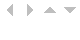

In [13]:
# Examine the results, then determine element that contains sought info
#soup
print(soup.prettify())

In [14]:
missions_data = soup.find_all('p')
print(missions_data)

[<p><strong>Mission:</strong> <a href="http://www.nasa.gov/mission_pages/station/expeditions/expedition63/index.html">Expedition 63</a><br/><strong>Date:</strong> July 21, 2020<br/><strong>Duration:</strong> <a href="http://go.nasa.gov/2OJZQN4">5 hours, 29 minutes</a><br/><strong>Spacewalkers:</strong> <a href="https://www.nasa.gov/astronauts/biographies/robert-l-behnken">Bob Behnken</a>, <a href="https://www.nasa.gov/astronauts/biographies/christopher-j-cassidy">Chris Cassidy</a></p>, <p><strong>Mission:</strong> <a href="http://www.nasa.gov/mission_pages/station/expeditions/expedition63/index.html">Expedition 63</a><br/><strong>Date:</strong> July 16, 2020<br/><strong>Duration:</strong> <a href="https://blogs.nasa.gov/spacestation/2020/07/16/nasa-astronauts-conclude-todays-spacewalk/">6 hours</a><br/><strong>Spacewalkers:</strong> <a href="https://www.nasa.gov/astronauts/biographies/robert-l-behnken">Bob Behnken</a>, <a href="https://www.nasa.gov/astronauts/biographies/christopher-j-

In [15]:
print(missions_data[10].text)
print (len(missions_data[0]))

Mission: Expedition 61Date: Oct. 18, 2019Duration: 7 hours, 17 minutesSpacewalkers: Christina Koch, Jessica Meir
16


In [16]:
mission_title = []
walk_date = []
walk_duration = []
walker_1 = []
walker_2 = []



for missions in missions_data:
    #print ('**************')
    #print(missions.text, len(missions), type(missions))
    #print(missions)
    print ('$$$$$$$$$$$$$$')
    
    data_head = missions.find_all("strong")
    data_value = missions.find_all("a")
    #print(data_head)
    #print(data_value)
    #print("Mission Date-->", miss_date)
    print("Data Values Length-->", len(data_value))
    
    if(len(data_value) > 2):
        #print(type(data_head), len(data_head), data_head[1].text)
        print(type(data_value), len(data_value), data_value[0].text)
        print(type(data_value), len(data_value), data_value[1].text)
        print(type(data_value), len(data_value), data_value[2].text)
        print(type(data_value), len(data_value), data_value[3].text)   
    
        mission_title.append(data_value[0].text)
#       walk_date.append(data_value[1].text)
        walk_duration.append(data_value[1].text)
        walker_1.append(data_value[2].text)
        walker_2.append(data_value[3].text)
    
#    print(temp)
    #walker_names = temp.split(',')
#    print(len(walker_names),walker_names)
    
#    walker_1.append(walker_names[0])
#    walker_2.append(walker_names[1])
#    for stuff in missions:
#        print(len(stuff), type(stuff), stuff)

    print ('##############')

$$$$$$$$$$$$$$
Data Values Length--> 4
<class 'bs4.element.ResultSet'> 4 Expedition 63
<class 'bs4.element.ResultSet'> 4 5 hours, 29 minutes
<class 'bs4.element.ResultSet'> 4 Bob Behnken
<class 'bs4.element.ResultSet'> 4 Chris Cassidy
##############
$$$$$$$$$$$$$$
Data Values Length--> 4
<class 'bs4.element.ResultSet'> 4 Expedition 63
<class 'bs4.element.ResultSet'> 4 6 hours
<class 'bs4.element.ResultSet'> 4 Bob Behnken
<class 'bs4.element.ResultSet'> 4 Chris Cassidy
##############
$$$$$$$$$$$$$$
Data Values Length--> 4
<class 'bs4.element.ResultSet'> 4 Expedition 63
<class 'bs4.element.ResultSet'> 4 6 hours, 1 minute
<class 'bs4.element.ResultSet'> 4 Chris Cassidy
<class 'bs4.element.ResultSet'> 4 Bob Behnken
##############
$$$$$$$$$$$$$$
Data Values Length--> 4
<class 'bs4.element.ResultSet'> 4 Expedition 63
<class 'bs4.element.ResultSet'> 4 6 hours, 7 minutes
<class 'bs4.element.ResultSet'> 4 Chris Cassidy
<class 'bs4.element.ResultSet'> 4 Bob Behnken
##############
$$$$$$$$$$$$$$


In [17]:
#print(len(mission_title), mission_title)
#print(len(walker_1), walker_1)
#print(len(walker_2), walker_2)

In [18]:
iss_space_walks = pd.DataFrame({
    'Mission Title': mission_title,
    'Space Walker One': walker_1,
    'Space Walker Two': walker_2
    })   
    
#put data in csv in case it is needed.
output_data_file = "iss_space_walks.csv"
iss_space_walks.to_csv(output_data_file, index= False)

iss_space_walks

,Mission Title,Space Walker One,Space Walker Two
0,Expedition 63,Bob Behnken,Chris Cassidy
1,Expedition 63,Bob Behnken,Chris Cassidy
2,Expedition 63,Chris Cassidy,Bob Behnken
3,Expedition 63,Chris Cassidy,Bob Behnken
4,Expedition 61,Luca Parmitano,Andrew Morgan
...,...,...,...
225,STS-101,James Voss,Jeff Williams
226,STS-96,Tamara Jernigan,Daniel Barry
227,STS-88,Jerry Ross,James Newman
228,STS-88,Jerry Ross,James Newman
